In [260]:
import pandas as pd
file_name = '/Users/divyatmika/Downloads/CCPP/Folds5x2_pp.xlsx'
df_dict = pd.read_excel(file_name, sheet_name=1)

In [272]:
from collections import OrderedDict
df = pd.DataFrame(df_dict, columns=df_dict.keys())
dataModel = pd.DataFrame(df_dict, columns=df_dict.keys()) #just keeping an additional temporary copy
dataModelMSE = pd.DataFrame(df_dict, columns=df_dict.keys())#just keeping an additional temporary copy

# Number of rows and columns 

In [262]:
rows = df.shape[0]
columns = df.shape[1]
print("There are",rows, "rows")
print("There are",columns, "columns")

There are 9568 rows
There are 5 columns


# AT, AP, RH, VP are the four attributes used to predict the output PE. 
A row implies a single findings or an observation and the columns describe properties about that findingsor observation.

# 1(b) (ii) scatterplots


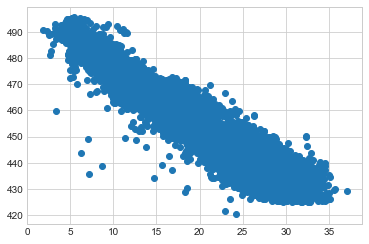

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = plt.scatter(x="AT", y="PE", data=df)

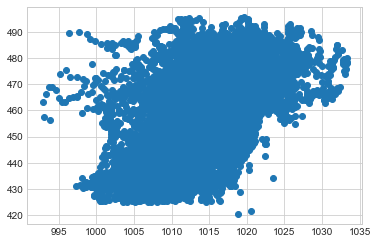

In [115]:
plot = plt.scatter(x="AP", y="PE", data=df)

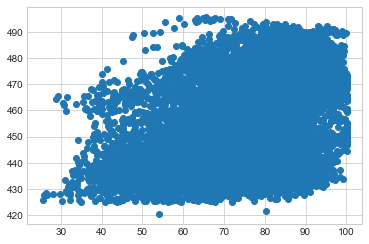

In [116]:
plot = plt.scatter(x="RH", y="PE", data=df)

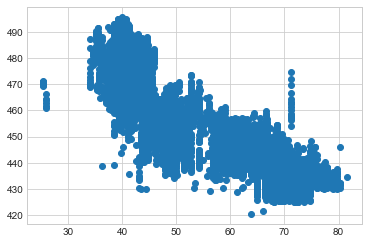

In [117]:
plot = plt.scatter(x="V", y="PE", data=df)


# Visualisation using Scatterplots : 
The strength of the correlation can be determined by how closely packed the points are to each other on the graph.
Also,one can check if there are any outliers if some values lies outside the general cluster. 
a. Feature AP : Few outliers in AP. Positive slope. 
b. Feature AT : This feature tends to show a negative slope and linear fit. 
c. Feature RH : Too scattered data. 
d. Feature V  : Feature v shows outliers in data. Negative slpoe. 

# Mean , median , Range, first, third , and interquartile range of each variable

In [35]:
print("RANGE")
print(df.max() - df.min())
print("\n")
print("QUANTILES") 
print(df.quantile([0.25,0.5,0.75]))
print("\n")
print("MEAN")
print(df.mean())
print("\n")
print("MEDIAN")
print(df.median())

RANGE
AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64


QUANTILES
          AT      V       AP       RH      PE
0.25  13.510  41.74  1009.10  63.3275  439.75
0.50  20.345  52.08  1012.94  74.9750  451.55
0.75  25.720  66.54  1017.26  84.8300  468.43


MEAN
AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64


MEDIAN
AT      20.345
V       52.080
AP    1012.940
RH      74.975
PE     451.550
dtype: float64


# Build a linear model and predict a response for each of the variable


In [121]:
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Analysing the summary of OLS results based on :
 I have used OLS module from statistical api. Below are the explanation for each of the term :  
Method : Least Squared which means that we are trying to fit the model such that  the squared distance from the regression line is minimum.  
DF of residuals relates to the degrees of freedom. [number of values that are free to vary] 
Coefficient – measures the rate of change of the predictor with respect to response.  
Adj R sqaured  - implies that by how much the response variable can be explained by the predictor.  
T-scores and P-values are used for hypothesis testing  
P-values means that probability of decrease or increase in the response variable (by coefficient )due to one unit increase in the predictor. A low value means that there results are statistically significant.  
Standard Error  – measures the accuracy of the predictor’s co-efficient by estimating the variation of the coefficient if the same test were run on different samples.  
Confidence Imterval : that is we predict at z% that coefficient value lies in the given range. 

In [122]:
AT_X = df[["AT"]]
AT_Y = df[["PE"]]
AT_lr = LinearRegression()
AT_lr.fit(AT_X, AT_Y)
print('Estimated intercept co-efficients ', AT_lr.intercept_)
print('Number of  co-efficients ', len(AT_lr.coef_))

Estimated intercept co-efficients  [497.03411989]
Number of  co-efficients  1


In [123]:
AT_X = df[["AT"]]
AT_Y = df[["PE"]]
AT_X = sm.add_constant(AT_X)
model_AT = sm.OLS(AT_Y, AT_X).fit()
model_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:45:49   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

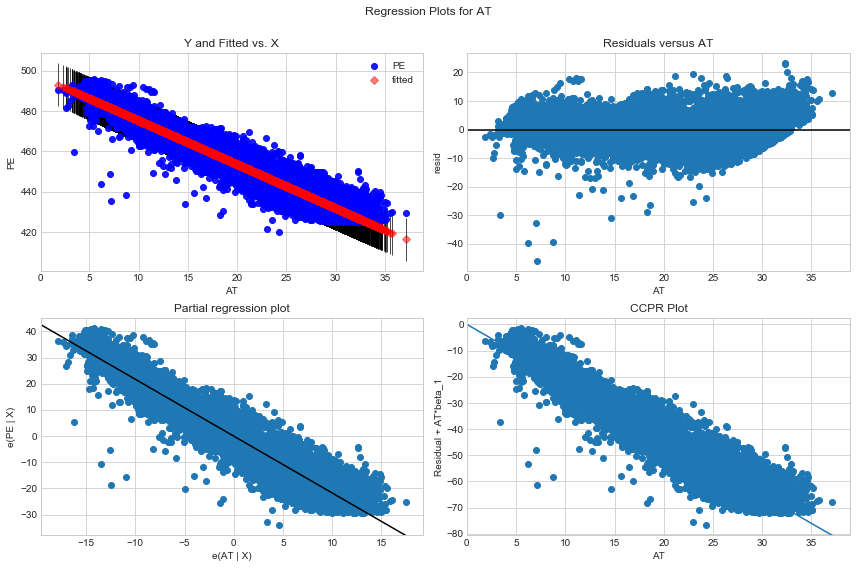

In [124]:
fig = plt.figure(figsize=(12,8))
fig_AT = sm.graphics.plot_regress_exog(model_AT, "AT", fig=fig)

# Interpretation about the parameter AT. 
(i.) High R value and low p value indicates that the parameter has an association to the model. 
(ii.) Also, if we observe the residual graph , one can see that the residuals should not be either systematically high or low. So, the residuals should be centered on zero throughout the range of fitted values. In other words, the model is correct on average for all fitted values. 
(iii.)Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range

In [179]:
RH_X = df[["RH"]]
RH_Y = df[["PE"]]
model_RH = sm.OLS(RH_Y, RH_X).fit()
model_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.727e+05
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:31:19   Log-Likelihood:                -55937.
No. Observations:                9568   AIC:                         1.119e+05
Df Residuals:                    9567   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             5.9789      0.011    522.205      0.000       5.956       6.001
==============================================================================
Omnibus:                      331.122   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.974
Skew:                           0.402   Prob(JB):                     1.48e-69
Kurtosis:                       2.616   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

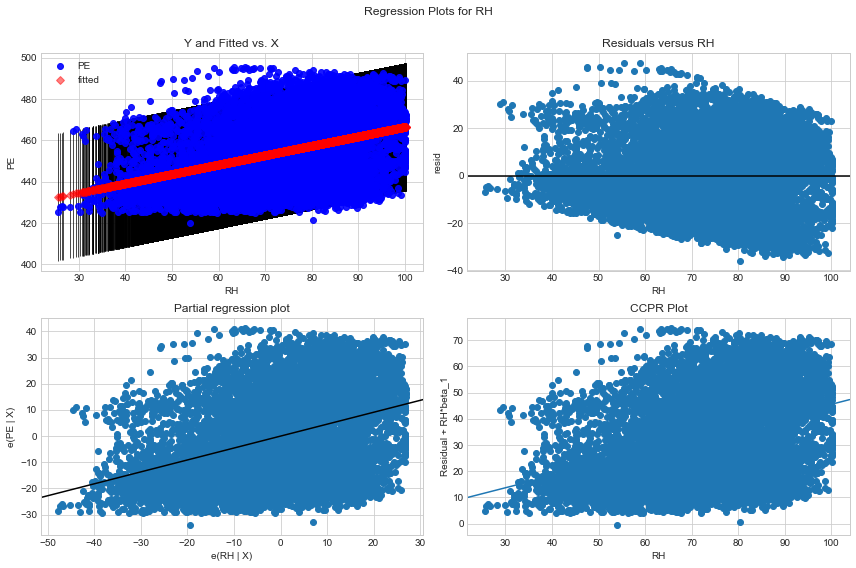

In [178]:
fig = plt.figure(figsize=(12,8))
fig_AT = sm.graphics.plot_regress_exog(model_RH, "RH", fig=fig)

# Interpretation about RH: 
High R value and low p value indicates that the parameter has an association to the model. (ii.) Also, if we observe the residual graph , one can see that the residuals should not be either systematically high or low. So, the residuals should be centered on zero throughout the range of fitted values. In other words, the model is correct on average for all fitted values. (iii.)Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range

In [182]:
V_X = df[["V"]]
V_Y = df[["PE"]]
model_V = sm.OLS(V_Y, V_X).fit()
model_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.318e+05
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:36:23   Log-Likelihood:                -59245.
No. Observations:                9568   AIC:                         1.185e+05
Df Residuals:                    9567   BIC:                         1.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V              7.8718      0.022    363.069      0.000       7.829       7.914
==============================================================================
Omnibus:                       34.680   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.586
Skew:                          -0.148   Prob(JB):                    3.02e-193
Kurtosis:                       1.538   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

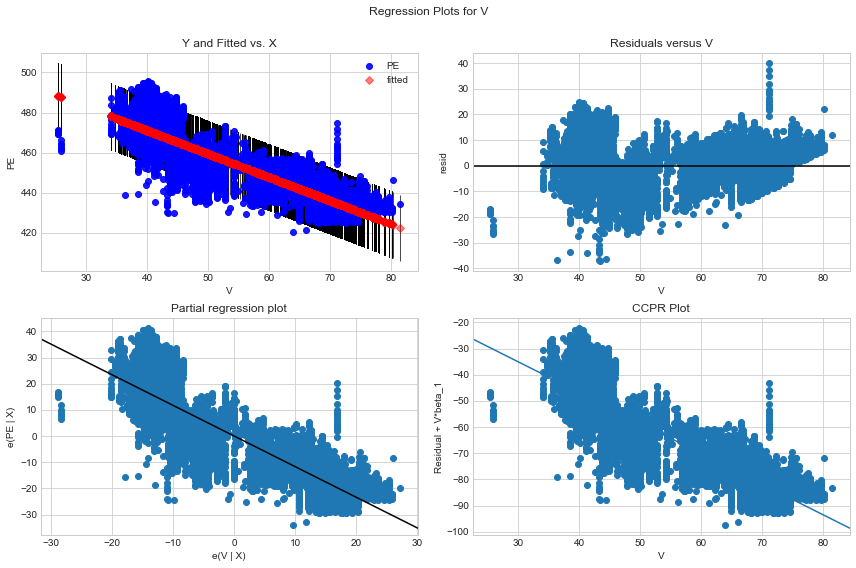

In [128]:
fig = plt.figure(figsize=(12,8))
fig_AT = sm.graphics.plot_regress_exog(model_V, "V", fig=fig)

# Interpretation for variable V: 
High R value and low p value indicates that the parameter has an association to the model. (ii.) Also, if we observe the residual graph , one can see that the residuals should not be either systematically high or low. So, the residuals should be centered on zero throughout the range of fitted values. In other words, the model is correct on average for all fitted values. (iii.)Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range
(iv. ) V also has outliers as one can see in the graphs

In [184]:
AP_X = df[["AP"]]
AP_Y = df[["PE"]]
AP_X = sm.add_constant(AP_X)
model_AP = sm.OLS(AP_Y, AP_X).fit()
model_AP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:37:12   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretation for variable AP : 
Low R value and low p value indicates that the parameter is not fitting well. 
(ii). The large range of confidence interval values indicates that the this parameter possess strong multicollinearity properties

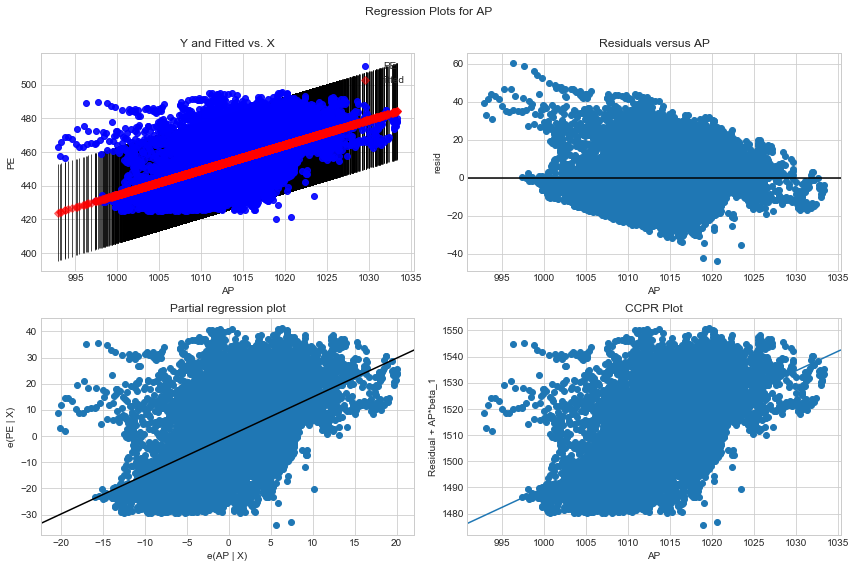

In [132]:
fig = plt.figure(figsize=(12,8))
fig_AP = sm.graphics.plot_regress_exog(model_AP, "AP", fig=fig)

# Yes there are outliers 

In [133]:
import statsmodels.formula.api as smf
results = smf.ols(formula='PE ~ AT', data=df).fit()
Y_pred = results.predict(df[["AT"]])
residual = df["PE"].values-Y_pred


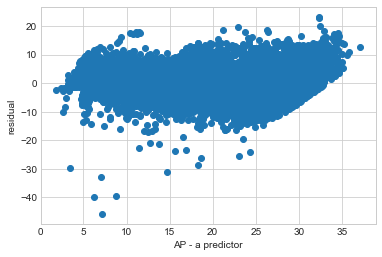

In [134]:
plt.scatter(df[["AT"]],residual)
plt.xlabel("AP - a predictor")
plt.ylabel("residual")
plt.show()

# 1. (D) - Fit a regression model using all of the predictors.

In [311]:
X_all = dataModelMSE[["AT", "AP", "RH", "V"]]
y = dataModelMSE["PE"]
X_al = sm.add_constant(X_all)
model_all = sm.OLS(y, X_al).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:55:37   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

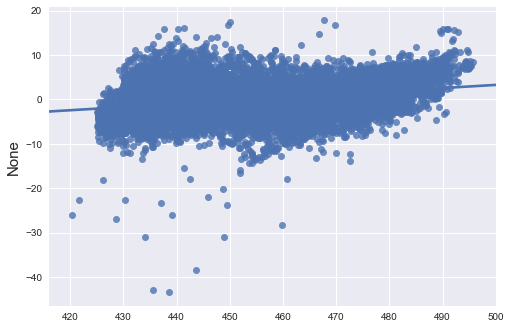

In [341]:
import statsmodels.formula.api as smf
X_all = dataModelMSE[["AT", "AP", "RH", "V"]]
results = smf.ols('PE~ AT + AP + RH + V', data=dataModelMSE).fit()
Y_pred = results.predict(dataModelMSE[["AT","AP","RH","V"]])
residuals = dataModelMSE["PE"].values-Y_pred
plot = sns.regplot(dataModelMSE[["PE"]], residuals,fit_reg=True)

# Multiple Regression model results : 
(i). High R2 value and low p values indicate that the linear model is fit.
(ii.) The above graph shows the residual vs actual PE values. 
(iii.) We can see that the model has outliers and also that it fits the linear model. 
(iv.) Since the p values are not > 0.05, we can assume that all the predictors can reject null hypothesis



# (1)(e.)Plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.

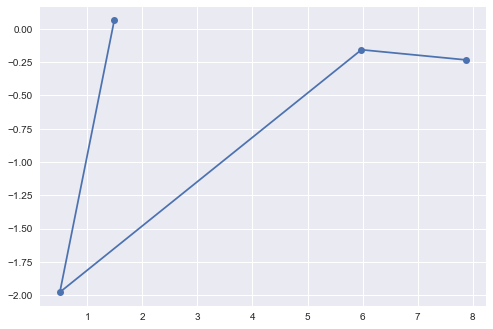

In [351]:
model_ap_uni = model_AP.params[1]
model_at_uni = model_AT.params[1]
model_rh_uni = model_RH.params[0]
model_v_uni = model_V.params[0]
model_ap = model_all.params[2]
model_at = model_all.params[1]
model_r = model_all.params[3]
model_v = model_all.params[4]
x = [model_ap_uni,model_at_uni,model_rh_uni,model_v_uni]
y = [model_ap,model_at,model_r,model_v]
plt.plot(x,y,marker='o')

# Compare results from linear reg model to multiple reg model :
The multivariate model has heteroscedasticity. As well as we can observe additive nature. We can neglect RH and V. And AT and AP. One can also find joint distributions. 

# 1(f). Analysing Non-linear Association 

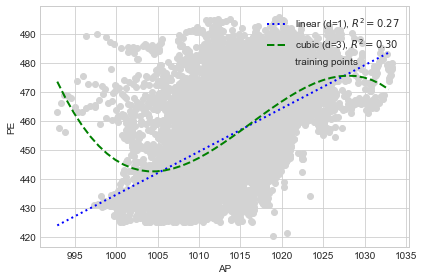

In [138]:
AT_X = df[['AP']].values
AT_y = df[['PE']].values
regr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
AT_X_cubic = cubic.fit_transform(AT_X)
AT_X_fit = np.arange(AT_X.min(), AT_X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(AT_X, AT_y)
y_lin_fit = regr.predict(AT_X_fit)
linear_r2 = r2_score(AT_y, regr.predict(AT_X))
 
regr = regr.fit(AT_X_cubic, AT_y)
y_cubic_fit = regr.predict(cubic.fit_transform(AT_X_fit))
cubic_r2 = r2_score(AT_y, regr.predict(AT_X_cubic))
plt.scatter(AT_X, AT_y, label='training points', color='lightgray')
 
plt.plot(AT_X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(AT_X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Result for AP : 
AP shows nonlinear association 

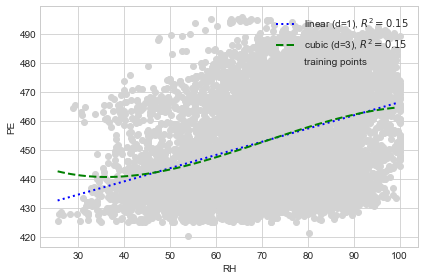

In [139]:
AT_X = df[['RH']].values
AT_y = df[['PE']].values
regr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
AT_X_cubic = cubic.fit_transform(AT_X)
AT_X_fit = np.arange(AT_X.min(), AT_X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(AT_X, AT_y)
y_lin_fit = regr.predict(AT_X_fit)
linear_r2 = r2_score(AT_y, regr.predict(AT_X))
 
regr = regr.fit(AT_X_cubic, AT_y)
y_cubic_fit = regr.predict(cubic.fit_transform(AT_X_fit))
cubic_r2 = r2_score(AT_y, regr.predict(AT_X_cubic))
plt.scatter(AT_X, AT_y, label='training points', color='lightgray')
 
plt.plot(AT_X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(AT_X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Result for RH : 
RH does not show non linear association 

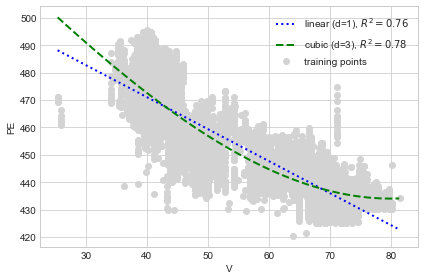

In [140]:
AT_X = df[['V']].values
AT_y = df[['PE']].values
regr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
AT_X_cubic = cubic.fit_transform(AT_X)
AT_X_fit = np.arange(AT_X.min(), AT_X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(AT_X, AT_y)
y_lin_fit = regr.predict(AT_X_fit)
linear_r2 = r2_score(AT_y, regr.predict(AT_X))
 
regr = regr.fit(AT_X_cubic, AT_y)
y_cubic_fit = regr.predict(cubic.fit_transform(AT_X_fit))
cubic_r2 = r2_score(AT_y, regr.predict(AT_X_cubic))
plt.scatter(AT_X, AT_y, label='training points', color='lightgray')
 
plt.plot(AT_X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(AT_X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('V')
plt.ylabel('PE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Result for V : 
Cubic R2 is much better than linear. Hence it shows non linear property.

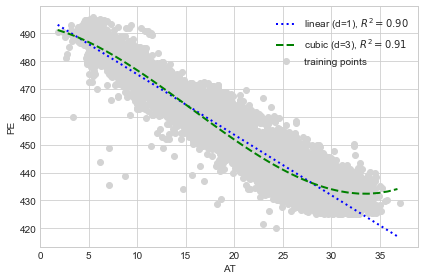

In [141]:
AT_X = df[['AT']].values
AT_y = df[['PE']].values
regr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
AT_X_cubic = cubic.fit_transform(AT_X)
AT_X_fit = np.arange(AT_X.min(), AT_X.max(), 1)[:, np.newaxis]
 
regr = regr.fit(AT_X, AT_y)
y_lin_fit = regr.predict(AT_X_fit)
linear_r2 = r2_score(AT_y, regr.predict(AT_X))
 
regr = regr.fit(AT_X_cubic, AT_y)
y_cubic_fit = regr.predict(cubic.fit_transform(AT_X_fit))
cubic_r2 = r2_score(AT_y, regr.predict(AT_X_cubic))
plt.scatter(AT_X, AT_y, label='training points', color='lightgray')
 
plt.plot(AT_X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')
 
plt.plot(AT_X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')
 
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Result for AT: 
R2 value is slightly better for cubic than for linear 

# 1(g.) Association of interactions


In [142]:
from sklearn import linear_model
import numpy as np
X = df[["AT", "AP","RH","V"]]
y = df[["PE"]]
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
lm = LinearRegression()
model = lm.fit(X_inter, y)



In [143]:
lm = smf.ols("PE ~ AT + AP + RH + V + AT * AP + AT * RH + AT * V + AP * RH + AP * V + RH * V", data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:05:31   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
AP:V           0.0068      0.001      5.135      0.000       0.004       0.009
RH:V           0.0008      0.000      1.716      0.086      -0.000       0.002
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Analysis for Pairwise Interaction terms : 
We can observe p - values to determine if the terms are statiscally significant. We neglect p values > 0.05
so we have 
(i). AP, RH, V, AT:AP, AT:RH : AT:V, AP:RH,AP:V
(ii) WE neglect RH:V and At:AP and AT

# 1(h.) Regression model with 70-30 dataset

# Train and test model for model 1 i.e. all the predictors only

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# X and Y Values
y = dataModelMSE["PE"]
x = dataModelMSE[['AT','AP','RH','V']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

# Model Intialization
reg = LinearRegression()
# Data Fitting for test data
reg = reg.fit(x_train, y_train)
Y_pred = reg.predict(x_test)
#for train data : 
Y_pred_train = reg.predict(x_train)

# Model Evaluation
mse = mean_squared_error(y_test, Y_pred)
mse_train = mean_squared_error(y_train, Y_pred_train)
#mse1 = np.mean((y_train - reg.predict(x_train)) ** 2)
#mse2 = np.mean((y_test - reg.predict(x_test)) ** 2)
print('MSE for test model :')
print(mse)
print('MSE for train model :')
print(mse_train)
print(reg.score(x_test,y_test))


MSE for test model :
20.402808491652888
MSE for train model :
20.932610913677145
0.9312854792843672


# Train and test model for model 2 i.e. including interaction terms , quadratic nonlinearities

In [269]:
at = []
ap = []
rh = []
v =  []
at_rh = []
at_v = []
ap_rh = []
ap_v = []
for index, row in dataModel.iterrows():
    at.append(row.AT * row.AT)
    ap.append(row.AP * row.AP)
    rh.append(row.RH * row.RH)
    v.append(row.V * row.V)
    at_rh.append(row.AT * row.RH)
    at_v.append(row.AT * row.V)
    ap_rh.append(row.AP * row.RH)
    ap_v.append(row.AP * row.V)
    
       
dataModel['AT*AT'] = at
dataModel['AP*AP'] = ap
dataModel['RH*RH'] = rh
dataModel['V*V'] = v
dataModel['AT*RH'] = at_rh
dataModel['AT*V'] = at_v
dataModel['AP*RH'] = ap_rh
dataModel['AP*V'] = ap_v


In [304]:
# X and Y Values
y = dataModel["PE"]
x = dataModel[['AT','AP','V','RH','AT*AT','AP*AP','RH*RH','AT*RH','AT*V','AP*RH','AP*V']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

# Model Intialization
reg = LinearRegression()
# Data Fitting for test data
reg = reg.fit(x_train, y_train)
Y_pred = reg.predict(x_test)
#for train data : 
Y_pred_train = reg.predict(x_train)

# Model Evaluation
mse = mean_squared_error(y_test, Y_pred)
mse_train = mean_squared_error(y_train, Y_pred_train)
#mse1 = np.mean((y_train - reg.predict(x_train)) ** 2)
#mse2 = np.mean((y_test - reg.predict(x_test)) ** 2)
print('MSE for test model :')
print(mse)
print('MSE for train model :')
print(mse_train)

MSE for test model :
17.95895784222379
MSE for train model :
18.19136702181751


# 1(i) KNN Regression


In [276]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
y = df["PE"]
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2)

In [277]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7654, 5) (7654,)
(1914, 5) (1914,)


In [67]:
rmse_val = []
rmse_train_val = []
result = {}
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    pred_train = model.predict(x_train)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    train_error = sqrt(mean_squared_error(y_train,pred_train)) #calculate rmse
    rmse_val.append(error) #store rmse values
    result.update({K: error})
    rmse_train_val.append(train_error)

# Test and Train Error Curve in terms of 1/K

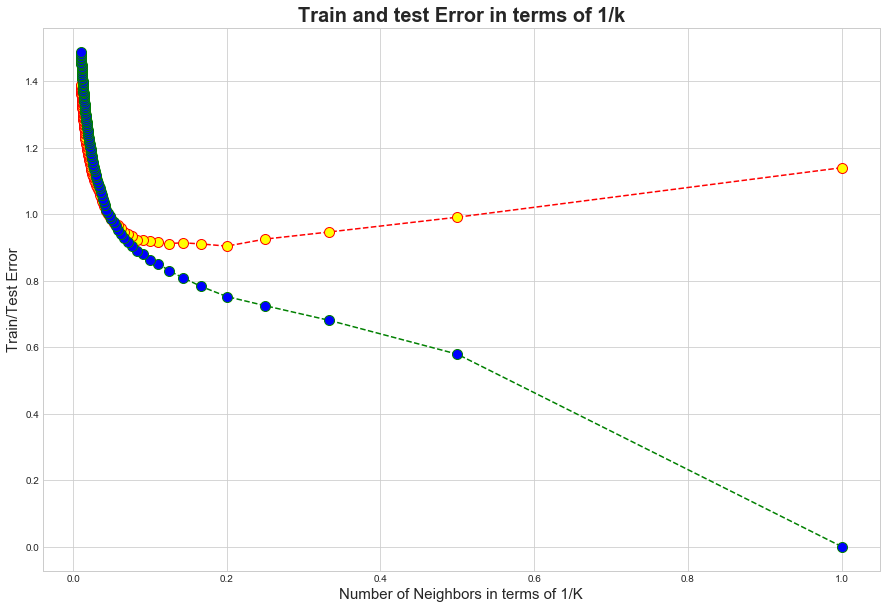

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
k_val = []
for k in range(1,101,1):
    k_val.append(1/k)

plt.figure(figsize=(15,10))
plt.title('Train and test Error in terms of 1/k', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors in terms of 1/K', fontsize=15)
plt.ylabel('Train/Test Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_val,rmse_val , color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.plot(k_val, rmse_train_val, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.show()


# Best k fit when processed using raw data : 5


In [69]:
min(result.items(), key=lambda x: x[1]) 

(5, 0.9041062901606463)

# Knn Regression for Normalised features

In [93]:
import numpy as np
from sklearn import preprocessing
y = df["PE"]
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
scaler = preprocessing.Normalizer()
scaler.fit(x_train)
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test) 




In [94]:

rmseval = []
rmsetrain_val = []
result_norm = {}
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    pred_train = model.predict(x_train)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    train_error = sqrt(mean_squared_error(y_train,pred_train)) #calculate rmse
    rmseval.append(error) #store rmse values
    result_norm.update({K: error})
    rmsetrain_val.append(train_error)
    
min(result_norm.items(), key=lambda x: x[1]) 

(4, 0.9035699363263524)

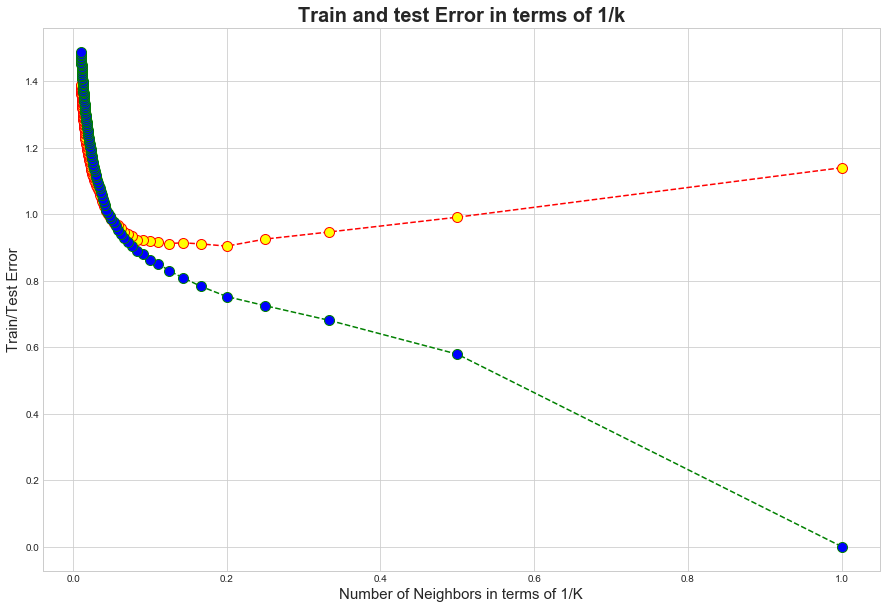

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
k_val = []
for k in range(1,101,1):
    k_val.append(1/k)

plt.figure(figsize=(15,10))
plt.title('Train and test Error in terms of 1/k', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors in terms of 1/K', fontsize=15)
plt.ylabel('Train/Test Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_val,rmse_val , color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.plot(k_val, rmse_train_val, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.show()

# Best k fit after normalization is 4

# Comparison between KNN Regression and linear Regression:
According to my observation 
(a.)MSE in knn is smaller than linear regression. Small k value provides the best fit and this is due to low bias but high variance. The reason behind high variance is beaause it is entirely dependent on one observation. And Larger k values provide smoother but less variable fit. 
(b.)Both of them gave better results with balanced dataset. 
(c.) the k-nn results were less biased than regression model results.
(d.) The performance of linear degrades slowly in the presence of additional noise variables. Like if we include AT*AP and RH*V the MSE becomes 18.~ but for KNN, it degardes much more faster. 